In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('indicum_dataset.csv')

In [3]:
df.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

In [4]:
df.shape

(48894, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [6]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

In [7]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As colunas "nome" e "host_name" possuem pouquíssimos valores nulos, 16 e 21, respectivamente. Por ser tratar de colunas mais descritivas, e não impactarem tanto no treinamento do modelo, preenchi os registros vazios pelo nome "Desconhecido"

In [8]:
df['nome'].fillna('Desconhecido', inplace=True)
df['host_name'].fillna('Desconhecido', inplace=True)

C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\966155869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nome'].fillna('Desconhecido', inplace=True)
C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\966155869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [9]:
df.isnull().sum()

id                                   0
nome                                 0
host_id                              0
host_name                            0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

A coluna "reviews_por_mes" possuem muitos valores nulos, o que pode influenciar em algumas perguntas como: "A quantidade de avaliações por mês influenciam o preço?", portanto, assumindo que os valores nulos são de imóveis que ainda não recebeream avaliações, substituirei os valores nulos nessa coluna por 0

In [10]:
df['reviews_por_mes'].fillna(0, inplace=True)

C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\2673211390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_por_mes'].fillna(0, inplace=True)


In [11]:
df.isnull().sum()

id                                   0
nome                                 0
host_id                              0
host_name                            0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Assumindo que a coluna "ultima_review" não impacta no treinamento do modelo e levando a consideração a grande quantidade de valores nulos, irei remover a coluna do meu dataframe

In [12]:
df.drop(columns='ultima_review', inplace=True)

In [13]:
# Valores únicos em cada variável
valores_unicos = []
for i in df.columns[0:17].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))


id : 48894
nome : 47905
host_id : 37457
host_name : 11453
bairro_group : 5
bairro : 221
latitude : 19048
longitude : 14718
room_type : 3
price : 674
minimo_noites : 109
numero_de_reviews : 394
reviews_por_mes : 938
calculado_host_listings_count : 47
disponibilidade_365 : 366


Avaliar as variáveis de forma individual através de gráficos 

In [14]:
#Quantidade de registros para cada grupo de bairros
df.groupby(['bairro_group']).size()

bairro_group
Bronx             1091
Brooklyn         20103
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

In [15]:
df.groupby(['bairro']).size()

bairro
Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Length: 221, dtype: int64

<Axes: title={'center': 'Quantidade de casas por grupo de bairros'}, xlabel='bairro_group'>

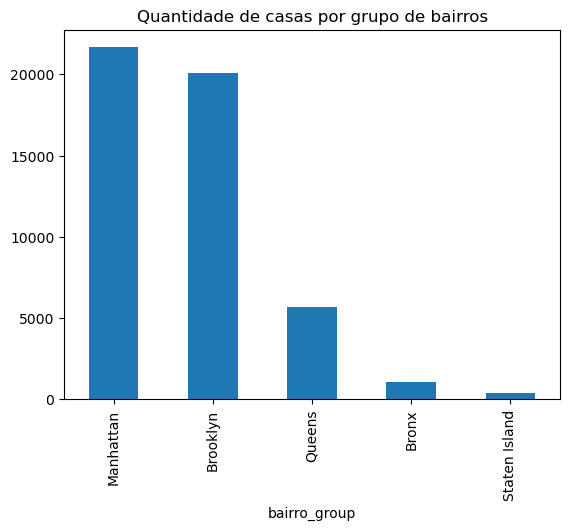

In [16]:
df.bairro_group.value_counts().plot(kind='bar', title='Quantidade de casas por grupo de bairros')

In [17]:
df.groupby(['room_type']).size()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
dtype: int64

<Axes: title={'center': 'Quantidade de casas por grupo de bairros'}, xlabel='room_type'>

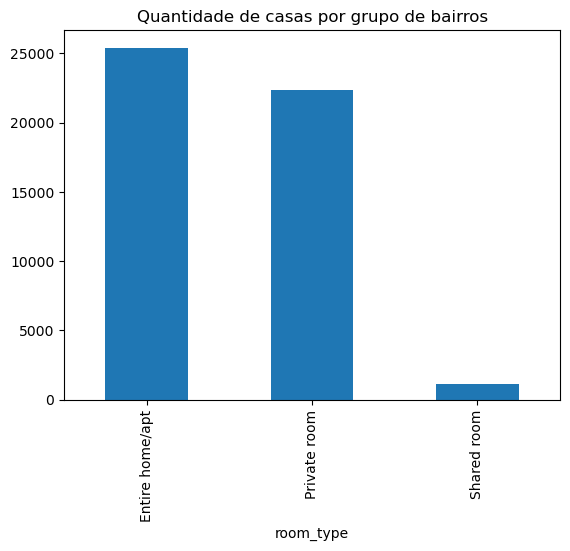

In [18]:
df.room_type.value_counts().plot(kind='bar', title='Quantidade de casas por grupo de bairros')

Observando a relação entra as variáveis e o preço

In [19]:
media_por_bairros = df.groupby('bairro_group')['price'].mean()

C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\1251592031.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='bairro_group', y='price', estimator=np.mean, ci=None)


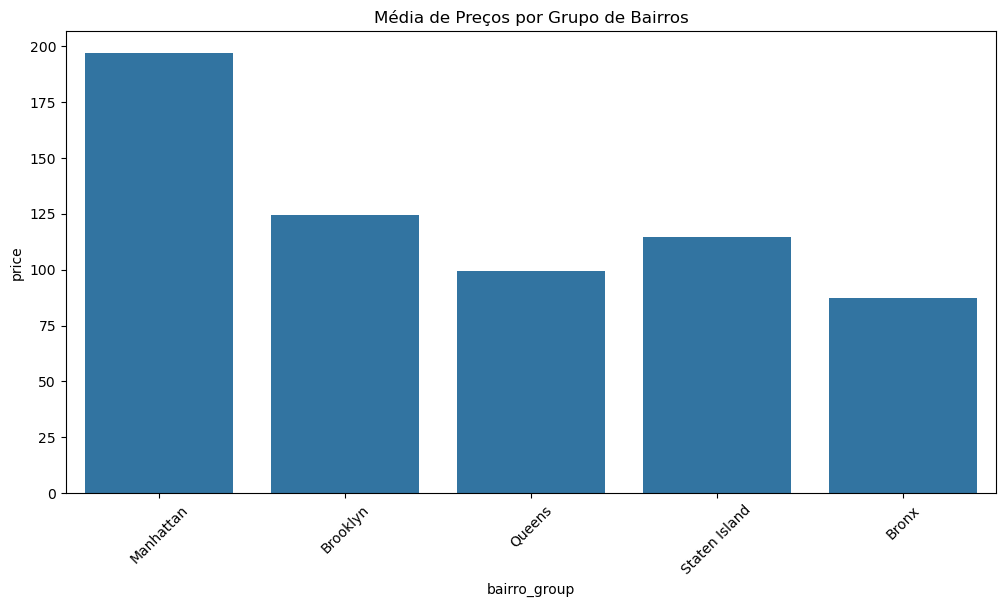

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='bairro_group', y='price', estimator=np.mean, ci=None)
plt.title('Média de Preços por Grupo de Bairros')
plt.xticks(rotation=45)
plt.show()

C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\1091024165.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado, x='bairro_group', y='quantidade', palette='viridis')


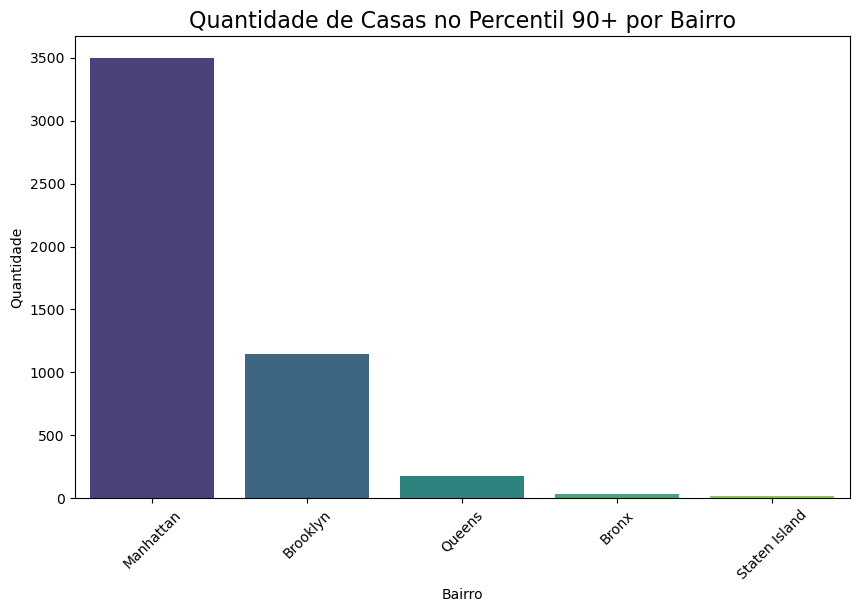

In [21]:
# Calcular o percentil 90
percentil_90 = df['price'].quantile(0.90)

# Filtrar as casas pertencentes ao percentil 90+
casas_mais_caras = df[df['price'] > percentil_90]

# Contar as casas por bairro no percentil 90+
contagem_casas_caras = casas_mais_caras['bairro_group'].value_counts()

# Criar um DataFrame para visualização
resultado = contagem_casas_caras.reset_index()
resultado.columns = ['bairro_group', 'quantidade']

# Visualizar os bairros com mais casas caras
plt.figure(figsize=(10, 6))
sns.barplot(data=resultado, x='bairro_group', y='quantidade', palette='viridis')
plt.title('Quantidade de Casas no Percentil 90+ por Bairro', fontsize=16)
plt.xlabel('Bairro')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

    bairro_group       media  mediana  minimo  maximo  desvio_padrao  \
0          Bronx   87.496792     65.0       0    2500     106.709349   
1       Brooklyn  124.381983     90.0       0   10000     186.878105   
2      Manhattan  196.875814    150.0       0   10000     291.383183   
3         Queens   99.517649     75.0      10   10000     167.102155   
4  Staten Island  114.812332     75.0      13    5000     277.620403   

      variancia  amplitude    iqr  
0  11386.885081       2500   54.0  
1  34923.426214      10000   90.0  
2  84904.159185      10000  125.0  
3  27923.130227       9990   60.0  
4  77073.088342       4987   60.0  


C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\4069240282.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bairro_group', y='price', palette='coolwarm')


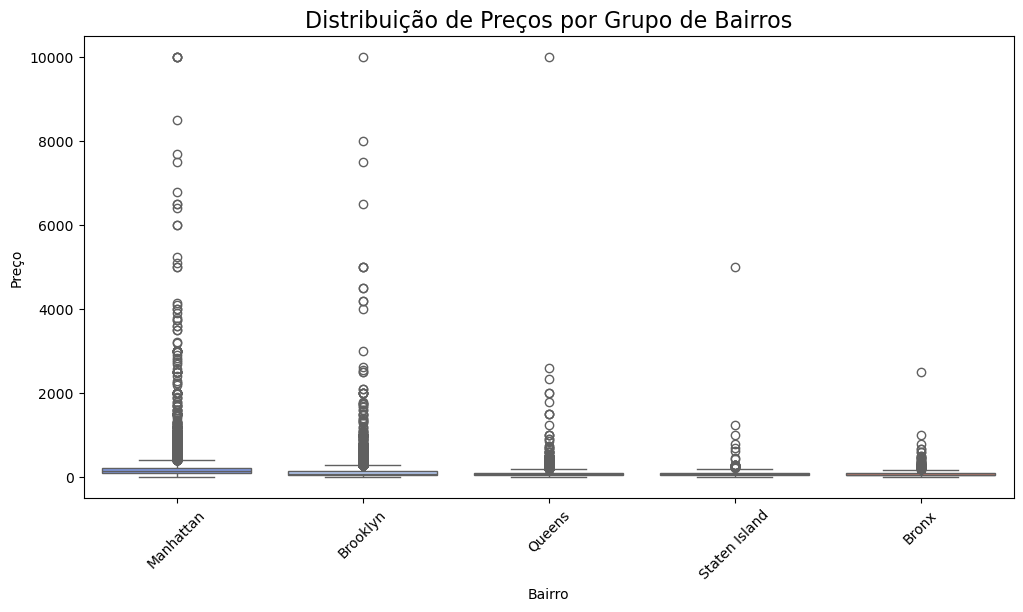

In [22]:
# Agrupar os dados por bairro e calcular medidas de posição e dispersão
estatisticas = df.groupby('bairro_group')['price'].agg(
    media='mean',
    mediana='median',
    minimo='min',
    maximo='max',
    desvio_padrao='std',
    variancia='var',
    amplitude=lambda x: x.max() - x.min(),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

# Exibir as estatísticas
print(estatisticas)

# Visualizar a dispersão por bairro com um boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bairro_group', y='price', palette='coolwarm')
plt.title('Distribuição de Preços por Grupo de Bairros', fontsize=16)
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()


O bairro do Bronx é onde existe a maior homogeniedade entre os valores da casa, o menor desvio padrão implica em dizer que os preços estão mais próximos da média, tendo menos outliers no grupo de bairros. Enquanto isso, Manhattan possui um desvio padrão muito alto, grande parte das casas pertencentes aos 10% mais caros estão na região

### 2A) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\2223603557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=preco_medio_bairro.head(10), x='price', y='bairro', palette='viridis')


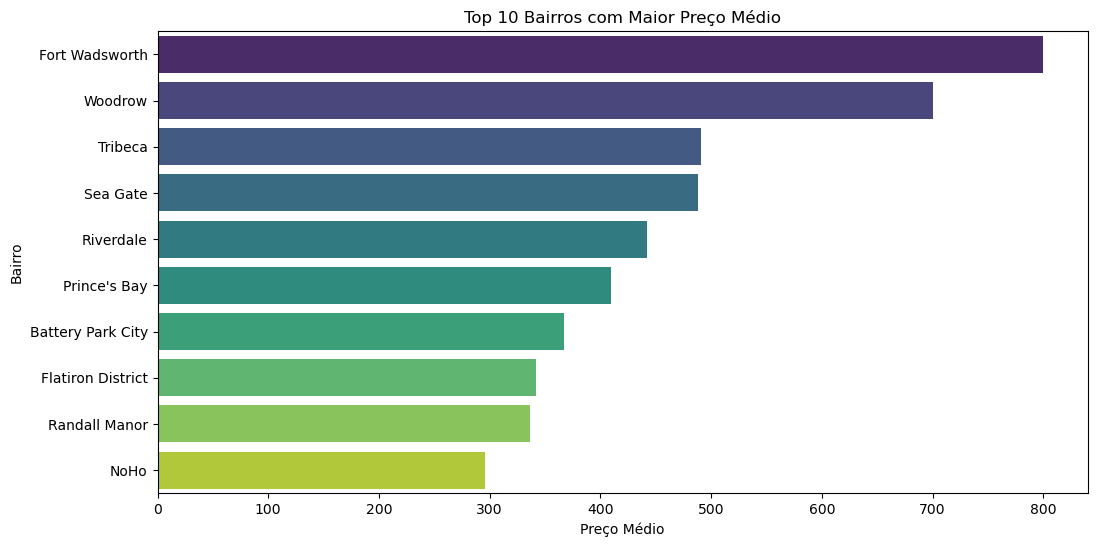

In [23]:
preco_medio_bairro = df.groupby('bairro')['price'].mean().reset_index()
preco_medio_bairro = preco_medio_bairro.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=preco_medio_bairro.head(10), x='price', y='bairro', palette='viridis')
plt.xlabel('Preço Médio')
plt.ylabel('Bairro')
plt.title('Top 10 Bairros com Maior Preço Médio')
plt.show()


C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\3267105430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews_por_bairro.head(10), x='numero_de_reviews', y='bairro', palette='coolwarm')


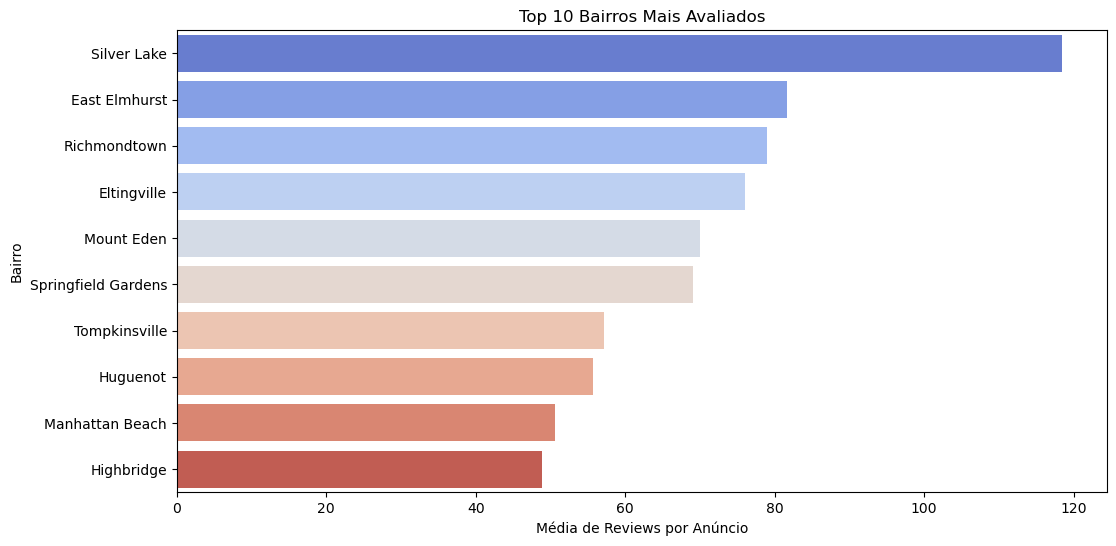

In [24]:
reviews_por_bairro = df.groupby('bairro')['numero_de_reviews'].mean().reset_index()
reviews_por_bairro = reviews_por_bairro.sort_values(by='numero_de_reviews', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=reviews_por_bairro.head(10), x='numero_de_reviews', y='bairro', palette='coolwarm')
plt.xlabel('Média de Reviews por Anúncio')
plt.ylabel('Bairro')
plt.title('Top 10 Bairros Mais Avaliados')
plt.show()


In [25]:
#### O bairro ideal deve ter uma boa relação entre o preço médio e a quantidade de reviews, que indica alta demanda

In [26]:
# Normalizar os dados para melhor comparação
from sklearn.preprocessing import MinMaxScaler

# Cruzar dados das duas métricas relevantes
investimento_ideal = df.groupby('bairro').agg({
    'price': 'mean',
    'numero_de_reviews': 'mean'
}).reset_index()

scaler = MinMaxScaler()
investimento_ideal[['price', 'numero_de_reviews']] = scaler.fit_transform(
    investimento_ideal[['price', 'numero_de_reviews']]
)

# Evitar divisão por zero ao normalizar
investimento_ideal['numero_de_reviews'] = investimento_ideal['numero_de_reviews'].replace(0, 0.01)

# Criar uma métrica final para ranqueamento, penalizando bairros com poucos reviews
investimento_ideal['score'] = (investimento_ideal['price'] * 0.6 + 
                               investimento_ideal['numero_de_reviews'] * 0.4) * (investimento_ideal['numero_de_reviews'] + 0.1)

# Ordenar os melhores bairros para investimento
investimento_ideal = investimento_ideal.sort_values(by='score', ascending=False)

# Mostrar os top 10 bairros mais indicados para investimento
print(investimento_ideal.head(10))


                  bairro     price  numero_de_reviews     score
177          Silver Lake  0.030115           1.000000  0.459876
69           Eltingville  0.125332           0.641350  0.245935
59         East Elmhurst  0.044974           0.689109  0.238807
165         Richmondtown  0.040744           0.666667  0.223187
183  Springfield Gardens  0.062314           0.583073  0.184852
135           Mount Eden  0.014836           0.590717  0.169356
101             Huguenot  0.094331           0.469761  0.139308
167            Riverdale  0.524479           0.224779  0.131405
194        Tompkinsville  0.038340           0.482218  0.125696
120      Manhattan Beach  0.074624           0.427215  0.113699


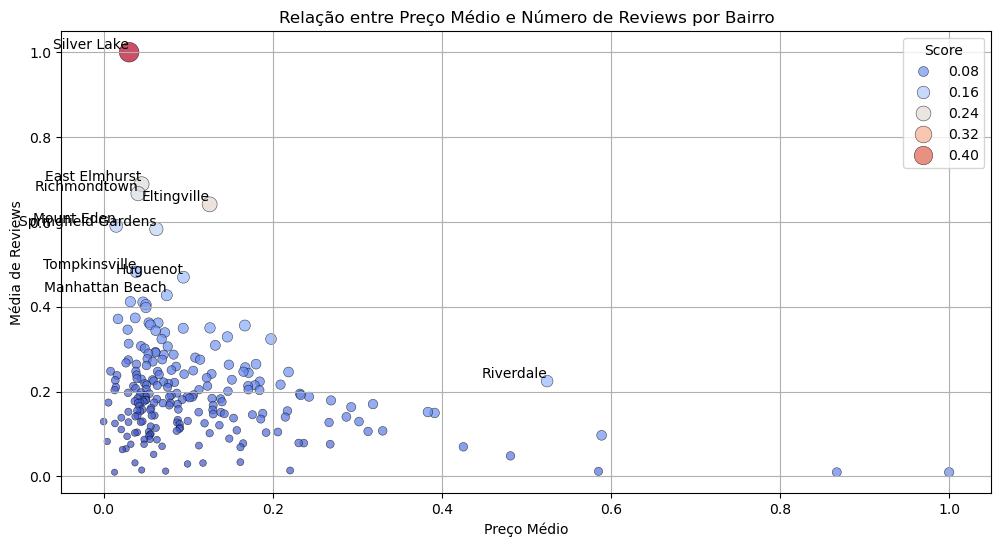

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar gráfico de dispersão
sns.scatterplot(data=investimento_ideal, x='price', y='numero_de_reviews', hue='score', size='score', palette='coolwarm', sizes=(20, 200), edgecolor='black', alpha=0.7)

# Adicionar rótulos para alguns pontos (apenas os 10 primeiros bairros)
for i in range(10):
    plt.text(investimento_ideal['price'].iloc[i], 
             investimento_ideal['numero_de_reviews'].iloc[i], 
             investimento_ideal['bairro'].iloc[i], 
             fontsize=10, ha='right', va='bottom')

# Melhorar a visualização
plt.xlabel('Preço Médio')
plt.ylabel('Média de Reviews')
plt.title('Relação entre Preço Médio e Número de Reviews por Bairro')
plt.grid(True)
plt.legend(title='Score', loc='upper right')

# Exibir gráfico
plt.show()

### Bairros como Fort Wadsworth e Woodrow possuem um valor médio muito assima da média, mas não possuem reviews, o que pode indicar baixíssima demanda tornando inviável o investimento. Portanto, penalizei a baixa quantidade de reviews

### Tendo como base a relação entre preço e demanda, Silver Lake seria o melhor bairro para investir

### 2B) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

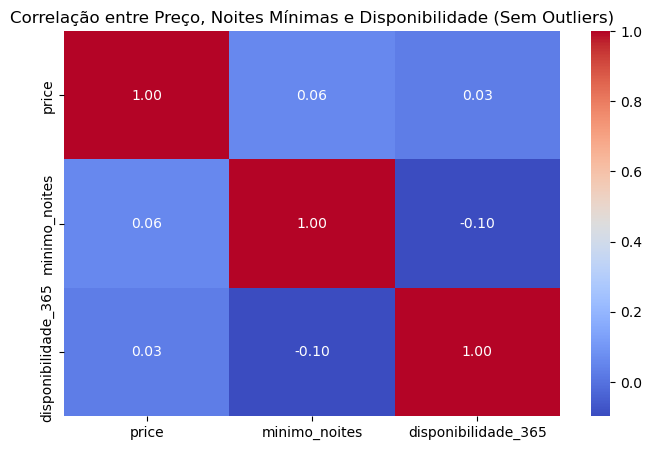

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para remover outliers com base no IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Remover outliers das colunas relevantes
df = remover_outliers(df, 'price')
df = remover_outliers(df, 'minimo_noites')
df = remover_outliers(df, 'disponibilidade_365')

# Calcular a correlação
correlacoes = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

# Exibir heatmap da correlação
plt.figure(figsize=(8, 5))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Preço, Noites Mínimas e Disponibilidade (Sem Outliers)")
plt.show()


Modelo 1 - Preço vs Noites Mínimas
Coeficiente: 5.56
Intercepto: 101.08
Erro Quadrático Médio (MSE): 3684.81
R²: 0.01

Modelo 2 - Preço vs Disponibilidade (365 dias)
Coeficiente: 0.01
Intercepto: 113.55
Erro Quadrático Médio (MSE): 3736.07
R²: -0.00


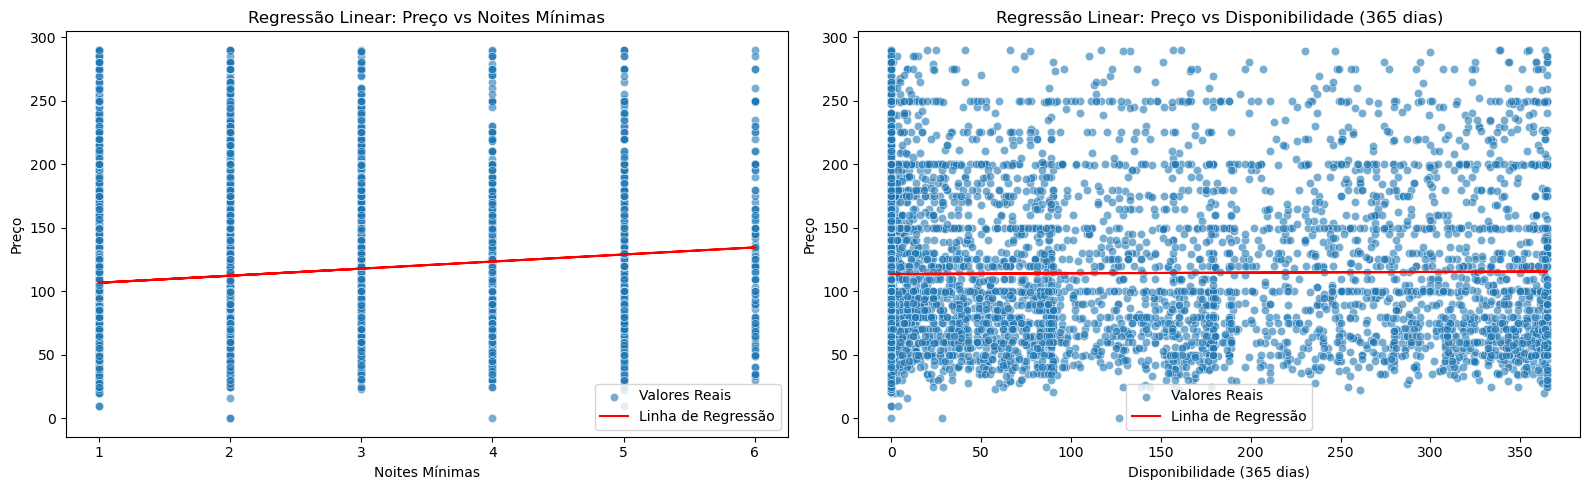

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o DataFrame seja carregado como 'df'
# df = pd.read_csv('seu_arquivo.csv')

# Função para remover outliers com base no IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Remover outliers das colunas 'price', 'minimo_noites' e 'disponibilidade_365'
df = remover_outliers(df, 'price')
df = remover_outliers(df, 'minimo_noites')
df = remover_outliers(df, 'disponibilidade_365')

# Variáveis dependentes e independentes para o primeiro gráfico
X1 = df[['minimo_noites']]
y1 = df['price']

# Dividir os dados em treino e teste para o primeiro gráfico
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo1 = LinearRegression()

# Treinar o modelo
modelo1.fit(X1_train, y1_train)

# Fazer previsões no conjunto de teste
y1_pred = modelo1.predict(X1_test)

# Avaliar o modelo
print(f"Modelo 1 - Preço vs Noites Mínimas")
print(f"Coeficiente: {modelo1.coef_[0]:.2f}")
print(f"Intercepto: {modelo1.intercept_:.2f}")
print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y1_test, y1_pred):.2f}")
print(f"R²: {r2_score(y1_test, y1_pred):.2f}\n")

# Variáveis dependentes e independentes para o segundo gráfico
X2 = df[['disponibilidade_365']]
y2 = df['price']

# Dividir os dados em treino e teste para o segundo gráfico
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo2 = LinearRegression()

# Treinar o modelo
modelo2.fit(X2_train, y2_train)

# Fazer previsões no conjunto de teste
y2_pred = modelo2.predict(X2_test)

# Avaliar o modelo
print(f"Modelo 2 - Preço vs Disponibilidade (365 dias)")
print(f"Coeficiente: {modelo2.coef_[0]:.2f}")
print(f"Intercepto: {modelo2.intercept_:.2f}")
print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y2_test, y2_pred):.2f}")
print(f"R²: {r2_score(y2_test, y2_pred):.2f}")

# Visualizar os resultados
plt.figure(figsize=(16, 5))

# Gráfico 1: Preço vs Noites Mínimas
plt.subplot(1, 2, 1)
sns.scatterplot(x=X1_test.squeeze(), y=y1_test, label="Valores Reais", alpha=0.6)
plt.plot(X1_test, y1_pred, color='red', label="Linha de Regressão")
plt.title("Regressão Linear: Preço vs Noites Mínimas")
plt.xlabel("Noites Mínimas")
plt.ylabel("Preço")
plt.legend()

# Gráfico 2: Preço vs Disponibilidade (365 dias)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X2_test.squeeze(), y=y2_test, label="Valores Reais", alpha=0.6)
plt.plot(X2_test, y2_pred, color='red', label="Linha de Regressão")
plt.title("Regressão Linear: Preço vs Disponibilidade (365 dias)")
plt.xlabel("Disponibilidade (365 dias)")
plt.ylabel("Preço")
plt.legend()

plt.tight_layout()
plt.show()


### A corrleação entre noites mínimas e a disponibilidade com o preço não é significativa, ela apresenta sim uma correlação positiva mas com um coeficiente baixíssmo, o que indica pouco impacto no valor

### Ao remover os outliers, percebi que a correlação entre o minimo de noites e o preço é sim significativa, sendo uma correlação positiva. Enquanto isso, não existe correlação significativa entre a disponibilidade e o preço

### 2C) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guepp\AppData\Roaming\nltk_data...


          palavra  frequencia
6       apartment         703
14        bedroom         633
34            apt         441
65        village         378
116        studio         366
46       spacious         343
7            east         324
56   williamsburg         288
18          heart         281
19           park         265


[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\guepp\AppData\Local\Temp\ipykernel_13324\4211525683.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locais_alto_valor['palavras'] = locais_alto_valor['nome'].str.lower().str.split()


<Figure size 1000x500 with 0 Axes>

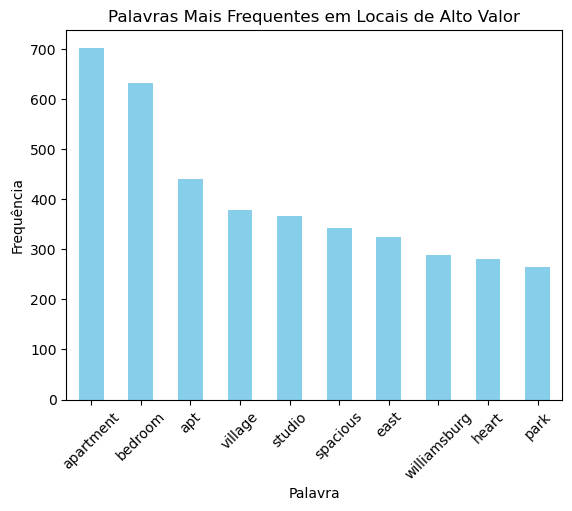

In [38]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Baixar stopwords do NLTK se necessário
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filtrar locais de alto valor (top 10% mais caros)
limiar_preco = df['price'].quantile(0.9)
locais_alto_valor = df[df['price'] >= limiar_preco]

# Tokenizar os nomes dos locais em palavras, removendo stopwords
locais_alto_valor['palavras'] = locais_alto_valor['nome'].str.lower().str.split()

# Remover stopwords e palavras irrelevantes
todas_palavras = [palavra for lista in locais_alto_valor['palavras'] for palavra in lista if palavra not in stop_words and palavra.isalpha()]

# Contar a frequência das palavras
frequencia_palavras = Counter(todas_palavras)

# Converter para DataFrame
df_palavras = pd.DataFrame(frequencia_palavras.items(), columns=['palavra', 'frequencia'])
df_palavras = df_palavras.sort_values(by='frequencia', ascending=False)

# Visualizar as palavras mais frequentes
print(df_palavras.head(10))

# Plotar as palavras mais frequentes
plt.figure(figsize=(10, 5))
df_palavras.head(10).plot(kind='bar', x='palavra', y='frequencia', legend=False, color='skyblue')
plt.title('Palavras Mais Frequentes em Locais de Alto Valor')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


##### Separando 10% dos bairros mais caros e contando a ocorrência de palavras no nome do bairro, não obtive um bom desempenho, pois nomes muito genéricos como "East" e "Side" ficaram no topo, mesmo não tendo causalidade com o preço do local. Portanto, usarei Processamento de Linguagem Natural(NLP) para avalir a real contribuição de uma palavra para o valor das locações no bairro

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supondo que o DataFrame seja 'df' com as colunas 'nome' e 'price'
# Remover valores nulos
df = df.dropna(subset=['nome', 'price'])

# Vetorização do texto dos nomes dos locais usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Limita a 100 palavras mais relevantes
X_text = vectorizer.fit_transform(df['nome'])

# Variável dependente correta (preço)
y = df['price']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Identificar as palavras mais relevantes
coeficientes = modelo.coef_
palavras_importantes = pd.DataFrame({'palavra': vectorizer.get_feature_names_out(), 'coeficiente': coeficientes})
palavras_importantes = palavras_importantes.sort_values(by='coeficiente', ascending=False)

print("Palavras mais associadas a preços altos:")
print(palavras_importantes.head(10))

print("\nPalavras mais associadas a preços baixos:")
print(palavras_importantes.tail(10))


Erro Quadrático Médio (MSE): 2759.339538853715
R²: 0.2613044358235833
Palavras mais associadas a preços altos:
    palavra  coeficiente
96  village    70.640662
83     soho    66.067980
26  chelsea    65.924729
2       2br    62.451880
34   duplex    58.081626
59  midtown    56.050004
1       1br    54.172101
57   luxury    50.555658
86   square    43.579117
50  kitchen    40.923539

Palavras mais associadas a preços baixos:
     palavra  coeficiente
66      nice   -24.470880
93     train   -25.837919
74   private   -29.293819
77    queens   -29.380238
88      stuy   -29.903568
52       lga   -30.312276
49       jfk   -32.718277
23  bushwick   -44.072170
81    shared   -65.258698
80      room   -77.690555


##### Utilizanddo NLP, recebi um MSE muito alto e um coeficiente de determinação muito baixo, o que pode indicar que não existe padrão entre os locais mais caros e o nome do bairro ou incapacidade do modelo de identificar essas relações